<a href="https://colab.research.google.com/github/slmayfield/Artificial_Neural_Network_project/blob/main/Module_4_Assignment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("googledrive")
install.packages("TTR")
install.packages("tidyverse")

library("googledrive")
library(TTR)
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘textshaping’, ‘ragg’


Warning message in install.packages("tidyverse"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘tidyverse’ had non-zero exit status”


In [ ]:
airfaredf <- read.csv("airfare.csv")
airfaredf

Year,Airfare
<int>,<dbl>
2004,402.26
2005,391.50
2006,405.48
2007,390.30
2008,400.27
2009,359.91
2010,383.48
2011,402.45
2012,406.13


In [ ]:
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



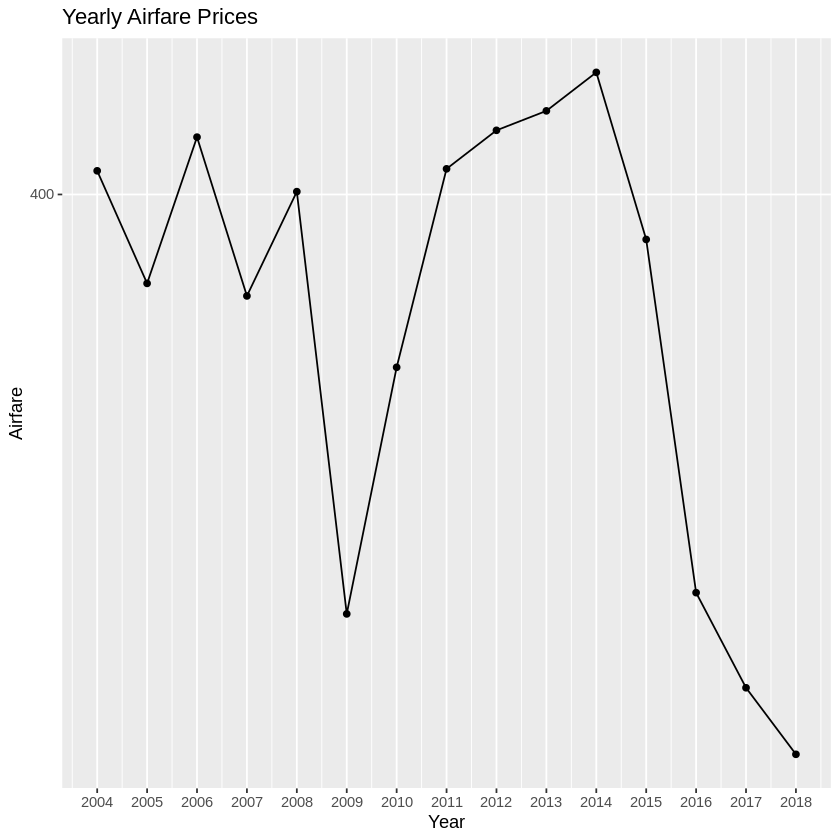

In [ ]:
ggplot(data=airfaredf,mapping=aes(x=Year, y=Airfare))+
  geom_line()+
  geom_point()+
  scale_x_continuous(breaks=seq(2004, 2018, by=1), name = "Year") + # add x-axis label and break points
  scale_y_continuous(breaks=seq(0, 800, by=100), name = "Airfare") + # add y-axis label and break points
  labs(title="Yearly Airfare Prices")


In [ ]:
sales_actuals<-airfaredf$Airfare
sales_actuals

[1] 402.26 391.50 405.48 390.30 400.27 359.91 383.48 402.45 406.13 407.99
[11] 411.67 395.70 361.94 352.85 346.49

In [ ]:
naive16<-c(NA,sales_actuals)
naive16

[1]     NA 402.26 391.50 405.48 390.30 400.27 359.91 383.48 402.45 406.13
[11] 407.99 411.67 395.70 361.94 352.85 346.49

In [ ]:
mae<-function(actual,pred){
  mae<-mean(abs(actual-pred),na.rm=TRUE)
  return(mae)
  }

In [ ]:
mse<-function(actual,pred){
  mse<-mean((actual-pred)^2,na.rm=TRUE)
  return(mse)
  }

In [ ]:
rmse<-function(actual,pred){
  rmse<-sqrt(mean((actual-pred)^2,na.rm = TRUE))
  return(rmse)
}

In [ ]:
mape<-function(actual,pred){
  mape<-mean(abs((actual-pred)/actual),na.rm=TRUE)*100
  return(mape)
}

In [ ]:
naive_pred<-naive16[-length(naive16)]

In [ ]:
mae(sales_actuals,naive_pred)
mse(sales_actuals,naive_pred)
rmse(sales_actuals,naive_pred)
mape(sales_actuals,naive_pred)

[1] 14.79929

[1] 338.1277

[1] 18.38825

[1] 3.905802

In [ ]:
sma16<-SMA(sales_actuals,n=3)
sma16

[1]       NA       NA 399.7467 395.7600 398.6833 383.4933 381.2200 381.9467
 [9] 397.3533 405.5233 408.5967 405.1200 389.7700 370.1633 353.7600

In [ ]:
sales_ma_pred<-c(NA,sma16[-length(sma3)])
sales_ma_pred


[1]       NA       NA       NA 399.7467 395.7600 398.6833 383.4933 381.2200
 [9] 381.9467 397.3533 405.5233 408.5967 405.1200 389.7700 370.1633

In [ ]:
mae(sales_actuals,sales_ma_pred)
mse(sales_actuals,sales_ma_pred)
rmse(sales_actuals,sales_ma_pred)
mape(sales_actuals,sales_ma_pred)

[1] 19.30083

[1] 562.8139

[1] 23.7237

[1] 5.178222

In [ ]:
#Exponential smoothing of n=1 is the first order. smoothing constand is the ratio, ratio=0.2#
exp13<-EMA(sales_actuals,n=1,ratio=0.2)
exp13

Warning message in EMA(sales_actuals, n = 1, ratio = 0.2):
“both 'n' and 'ratio' are specified; using 'n'”


[1] 402.2600 400.1080 401.1824 399.0059 399.2587 391.3890 389.8072 392.3358
 [9] 395.0946 397.6737 400.4729 399.5184 392.0027 384.1721 376.6357

In [ ]:
exp_pred<-c(NA,exp13[-length(exp13)])
exp_pred

[1]       NA 402.2600 400.1080 401.1824 399.0059 399.2587 391.3890 389.8072
 [9] 392.3358 395.0946 397.6737 400.4729 399.5184 392.0027 384.1721

In [ ]:
mae(sales_actuals,exp_pred)
mse(sales_actuals,exp_pred)
rmse(sales_actuals,exp_pred)
mape(sales_actuals,exp_pred)

[1] 17.71794

[1] 498.2598

[1] 22.32173

[1] 4.773673

In [ ]:
exp13_4<-EMA(sales_actuals,n=1,ratio=0.8)
round(exp13_4,2)


Warning message in EMA(sales_actuals, n = 1, ratio = 0.8):
“both 'n' and 'ratio' are specified; using 'n'”


[1] 402.26 393.65 403.11 392.86 398.79 367.69 380.32 398.02 404.51 407.29
[11] 410.79 398.72 369.30 356.14 348.42

In [ ]:
exp_pred_4<-c(NA,exp13_4[-length(exp13)])
exp_pred_4

[1]       NA 402.2600 393.6520 403.1144 392.8629 398.7886 367.6857 380.3211
 [9] 398.0242 404.5088 407.2938 410.7948 398.7190 369.2958 356.1392

In [ ]:
mae(sales_actuals,exp_pred_4)
mse(sales_actuals,exp_pred_4)
rmse(sales_actuals,exp_pred_4)
mape(sales_actuals,exp_pred_4)

[1] 15.25307

[1] 340.4664

[1] 18.45173

[1] 4.039488

Part 2

In [ ]:
# Step 2: Linear regression to model ONLY the trend
# Create a time index variable
musicdf$Time_Index <- 1:nrow(musicdf)

# Fit a linear regression model to the data
trend_model <- lm(Revenue ~ Time_Index, data = musicdf)


In [ ]:
# Step 3: Calculate accuracy measures for predicted values based on the regression in (2)
# Use the fitted model to predict the values of revenue for each quarter
predicted_values <- predict(trend_model)

# Calculate the RMSE between the predicted and actual values
RMSE <- sqrt(mean((predicted_values - musicdf$Revenue)^2))
round(RMSE,2)

[1] 72.07

In [ ]:
musicdf<- read.csv("warner_music.csv")
musicdf

Quarter,Revenue
<chr>,<int>
2015Q4,750
2016Q1,849
2016Q2,745
2016Q3,811
2016Q4,841
2017Q1,917
2017Q2,825
2017Q3,917
2017Q4,917


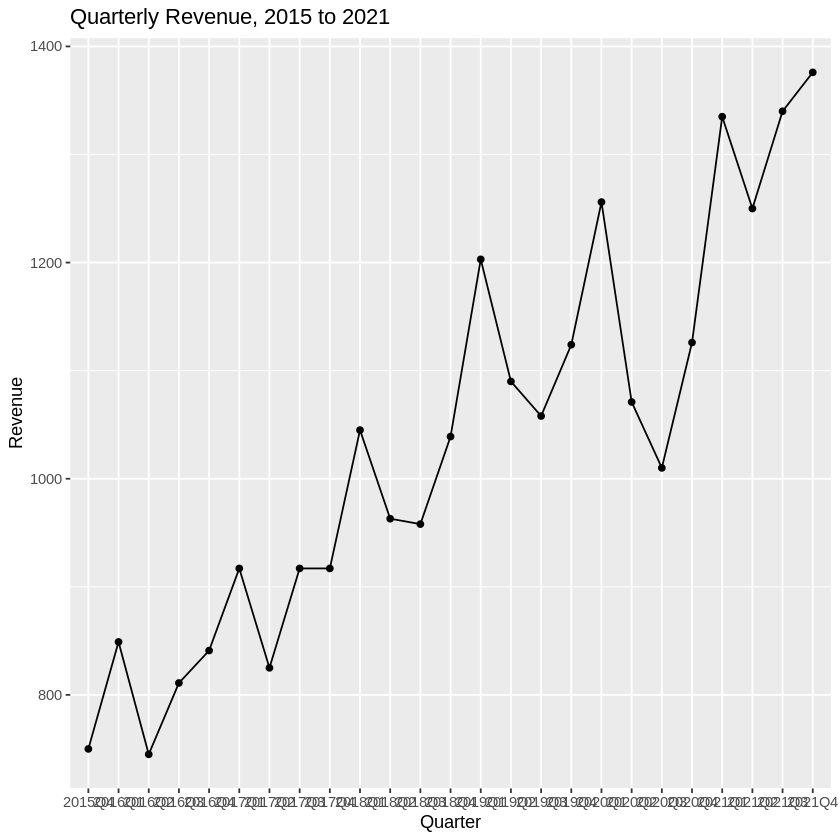

In [ ]:
ggplot(data=musicdf,mapping=aes(x=Quarter,y=Revenue))+
  geom_line(group=1)+
  geom_point()+
  labs(title="Quarterly Revenue, 2015 to 2021", x="Quarter",y="Revenue")

In [ ]:
musicdf$Time_Index <- 1:nrow(musicdf)

# Fit a linear regression model to the data
trend_model <- lm(Revenue ~ Time_Index, data = musicdf)

In [ ]:
# Fit a linear regression model to the data
model <- lm(Revenue ~ Quarter, data = musicdf)
model


Call:
lm(formula = Revenue ~ Quarter, data = musicdf)

Coefficients:
  (Intercept)  Quarter2016Q1  Quarter2016Q2  Quarter2016Q3  Quarter2016Q4  
          750             99             -5             61             91  
Quarter2017Q1  Quarter2017Q2  Quarter2017Q3  Quarter2017Q4  Quarter2018Q1  
          167             75            167            167            295  
Quarter2018Q2  Quarter2018Q3  Quarter2018Q4  Quarter2019Q1  Quarter2019Q2  
          213            208            289            453            340  
Quarter2019Q3  Quarter2019Q4  Quarter2020Q1  Quarter2020Q2  Quarter2020Q3  
          308            374            506            321            260  
Quarter2020Q4  Quarter2021Q1  Quarter2021Q2  Quarter2021Q3  Quarter2021Q4  
          376            585            500            590            626  


In [ ]:
# Extract the slope coefficient for the trend variable
slope <- coef(model)[2]

In [ ]:
slope

Quarter2016Q1 
           99

In [ ]:
# Round the slope coefficient to two decimal places
slope <- round(slope, 2)

# Print the slope coefficient
cat("The slope coefficient for the trend variable is", slope)

The slope coefficient for the trend variable is 99

In [ ]:
musicdf$Time<-1:nrow(musicdf)

In [ ]:
sbreg<-lm(Revenue~Time,data=musicdf)
summary(sbreg)


Call:
lm(formula = Revenue ~ Time, data = musicdf)

Residuals:
    Min      1Q  Median      3Q     Max 
-184.97  -44.21   -4.36   52.27  147.17 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  731.170     30.981   23.60  < 2e-16 ***
Time          23.190      2.084   11.13 9.82e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 75.14 on 23 degrees of freedom
Multiple R-squared:  0.8433,	Adjusted R-squared:  0.8365 
F-statistic: 123.8 on 1 and 23 DF,  p-value: 9.816e-11


In [ ]:
#Predict music revenue for 2022#
731.170+23.190*26


[1] 1334.11

In [ ]:
#Create an object with the time periods to use for the prediciton
new<-data.frame(Time=c(26,27,28,29))
predict(sbreg,newdata=new)

1       2       3       4 
1334.11 1357.30 1380.49 1403.68

In [ ]:
mae<-function(actual,pred){
  mae<-mean(abs(actual-pred),na.rm=TRUE)
  return(mae)
  }

In [ ]:
mse<-function(actual,pred){
  mse<-mean((actual-pred)^2,na.rm=TRUE)
  return(mse)
  }

In [ ]:
rmse<-function(actual,pred){
  rmse<-sqrt(mean((actual-pred)^2,na.rm = TRUE))
  return(rmse)
}

In [ ]:
mape<-function(actual,pred){
  mape<-mean(abs((actual-pred)/actual),na.rm=TRUE)*100
  return(mape)
}

In [ ]:
sb_pred=predict(sbreg)

In [ ]:
mae(musicdf$Revenue,sb_pred)
mse(musicdf$Revenue,sb_pred)
rmse(musicdf$Revenue,sb_pred)
mape(musicdf$Revenue,sb_pred)

[1] 54.664

[1] 5194.353

[1] 72.07186

[1] 5.19103

In [ ]:
sb_res=resid(sbreg)

In [ ]:
pred_res_df<-data.frame(sb_pred,sb_res)

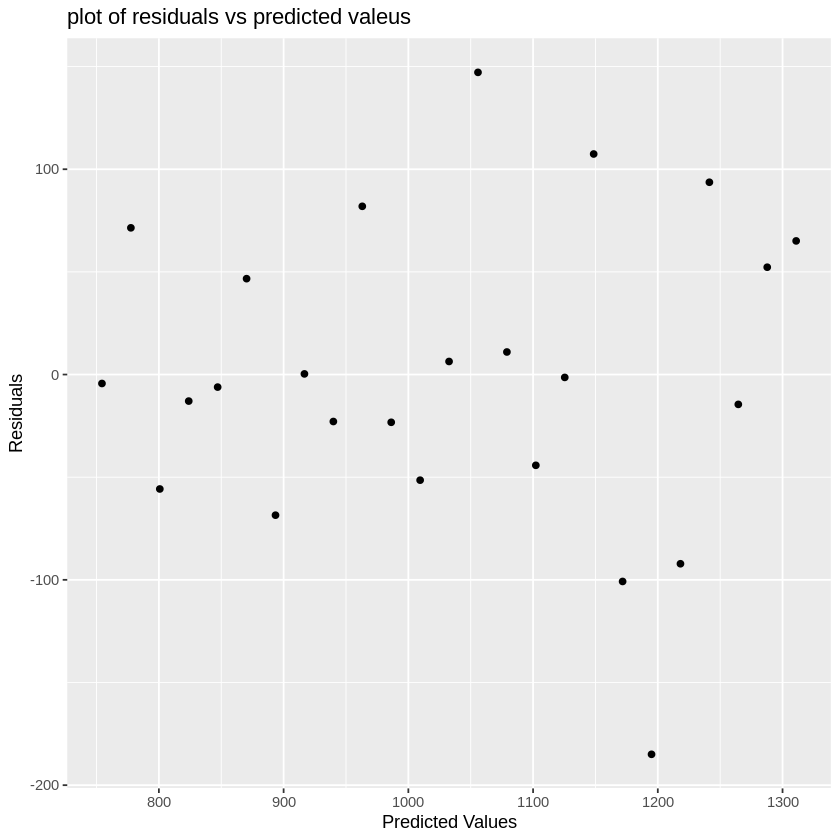

In [ ]:
ggplot(data=pred_res_df, mapping=aes(x=sb_pred ,y=sb_res))+
  geom_point()+
  labs(title="plot of residuals vs predicted valeus",x="Predicted Values",y="Residuals")

In [ ]:
musicdf$Q1<-ifelse(grepl("Q1",musicdf$Quarter),1,0)
musicdf$Q2<-ifelse(grepl("Q2",musicdf$Quarter),1,0)
musicdf$Q3<-ifelse(grepl("Q3",musicdf$Quarter),1,0)
musicdf$Q4<-ifelse(grepl("Q4",musicdf$Quarter),1,0)

In [ ]:
musicdf

Quarter,Revenue,Time_Index,Time,Q1,Q2,Q3,Q4
<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
2015Q4,750,1,1,0,0,0,1
2016Q1,849,2,2,1,0,0,0
2016Q2,745,3,3,0,1,0,0
2016Q3,811,4,4,0,0,1,0
2016Q4,841,5,5,0,0,0,1
2017Q1,917,6,6,1,0,0,0
2017Q2,825,7,7,0,1,0,0
2017Q3,917,8,8,0,0,1,0
2017Q4,917,9,9,0,0,0,1


In [ ]:
musicreg<-lm(Revenue ~ Time,data=musicdf)
summary(musicreg)


Call:
lm(formula = Revenue ~ Time, data = musicdf)

Residuals:
    Min      1Q  Median      3Q     Max 
-184.97  -44.21   -4.36   52.27  147.17 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  731.170     30.981   23.60  < 2e-16 ***
Time          23.190      2.084   11.13 9.82e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 75.14 on 23 degrees of freedom
Multiple R-squared:  0.8433,	Adjusted R-squared:  0.8365 
F-statistic: 123.8 on 1 and 23 DF,  p-value: 9.816e-11


In [ ]:
music_pred=predict(musicreg)

In [ ]:
mae(musicdf$Revenue,music_pred)
mse(musicdf$Revenue,music_pred)
rmse(musicdf$Revenue,music_pred)
mape(musicdf$Revenue,music_pred)

In [ ]:
musicdf2<-lm(Revenue~Time+Q2+Q3+Q4,data=musicdf)
summary(musicdf2)


Call:
lm(formula = Revenue ~ Time + Q2 + Q3 + Q4, data = musicdf)

Residuals:
     Min       1Q   Median       3Q      Max 
-148.483  -12.503    4.075   21.305   86.305 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  815.200     28.559  28.544  < 2e-16 ***
Time          23.803      1.508  15.784 9.37e-13 ***
Q2          -133.969     31.283  -4.283 0.000363 ***
Q3          -132.772     31.392  -4.230 0.000411 ***
Q4           -99.922     30.148  -3.314 0.003460 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 54.12 on 20 degrees of freedom
Multiple R-squared:  0.9293,	Adjusted R-squared:  0.9152 
F-statistic: 65.75 on 4 and 20 DF,  p-value: 3.197e-11


In [ ]:
music_pred_2=predict(musicdf2)

In [ ]:
mae(musicdf$Revenue,music_pred_2)
mse(musicdf$Revenue,music_pred_2)
rmse(musicdf$Revenue,music_pred_2)
mape(musicdf$Revenue,music_pred_2)

ERROR: ignored

In [ ]:
new<-data.frame(Time=c(49,50,51,52),Q2=c(0,1,0,0),Q3=c(0,0,1,0),Q4=c(0,0,0,1))
predict(musicdf2,newdata=new)

1        2        3        4 
1981.537 1871.370 1896.370 1953.023

In [ ]:
#Simple moving average of n=3#
sma3<-SMA(sales_actuals,n=3)
sma3

In [ ]:
sales_ma_pred<-c(NA,sma3[-length(sma3)])
sales_ma_pred

In [ ]:
sales_ma_pred<-c(NA,sma3[-length(sma3)])
sales_ma_pred
mae(sales_actuals,sales_ma_pred)
mse(sales_actuals,sales_ma_pred)
rmse(sales_actuals,sales_ma_pred)
mape(sales_actuals,sales_ma_pred)

In [ ]:
sales_actuals <- airfaredf$Airfare

mae <- function(actual, pred) {
  mae <- mean(abs(actual - pred), na.rm = TRUE)
  return(mae)
}

rmse <- function(actual, pred) {
  mse <- mean((actual - pred)^2, na.rm = TRUE)
  rmse <- sqrt(mse)
  return(rmse)
}

mse <- function(actual, pred) {
  mse <- mean((actual - pred)^2, na.rm = TRUE)
  return(mse)
}

mape <- function(actual, pred) {
  mape <- mean(abs((actual - pred) / actual), na.rm = TRUE) * 100
  return(mape)
}

naive13 <- c(NA, sales_actuals)
naive_pred <- naive13[-length(naive13)]

mae(sales_actuals, naive_pred)
mse(sales_actuals, naive_pred)
rmse(sales_actuals, naive_pred)
mape(sales_actuals, naive_pred)

#Simple moving average of n=3#
sma3 <- SMA(sales_actuals, n = 3)
sales_ma_pred <- c(NA, sma3[-length(sma3)])

mae(sales_actuals, sales_ma_pred)
mse(sales_actuals, sales_ma_pred)
rmse(sales_actuals, sales_ma_pred)
mape(sales_actuals, sales_ma_pred)


In [ ]:
# Get the last three observations of the simple moving average
sma_last_three <- tail(sales_ma_pred, n = 3)

# Calculate the forecast for 2019 by taking the average of the last three observations
forecast_2019 <- mean(sma_last_three)

# Round the forecast to two decimal places
forecast_2019 <- (forecast_2019)

# Print the forecast
cat("The 2019 average airfare forecast using the simple moving average technique is:", forecast_2019)


In [ ]:
sma3 <- SMA(sales_actuals, n = 3)
sales_ma_pred <- c(NA, sma3[-length(sma3)])
mae(sales_actuals, sales_ma_pred)


In [ ]:
install.packages("forecast")
library(forecast)

In [ ]:
# Fit the simple exponential smoothing model
fit_ses <- ses(sales_actuals, alpha = 0.2)

# Forecast the average airfare for 2019
forecast_ses <- forecast(fit_ses, h = 1)$mean["2019"]

# Round the forecast to two decimal places
forecast_ses <- round(forecast_ses, 2)

# Print the forecast
forecast_ses

In [ ]:
# Simple moving average of n=3
sma3 <- SMA(sales_actuals, n = 3)

# Predicted values up to 2018
sma_pred <- c(NA, sma3[-length(sma3)])

# Actual values up to 2018
sma_actual <- sales_actuals[1:length(sales_actuals)-1]

# Calculate MAE
sma_mae <- mean(abs(sma_actual - sma_pred), na.rm = TRUE)
sma_mae

# Calculate MSE
sma_mse <- mean((sma_actual - sma_pred)^2, na.rm = TRUE)
sma_mse

# Calculate RMSE
sma_rmse <- sqrt(sma_mse)
sma_rmse

# Calculate MAPE
sma_mape <- mean(abs((sma_actual - sma_pred) / sma_actual), na.rm = TRUE) * 100
sma_mape


In [ ]:
# Calculate MAE
mae(sales_actuals, sales_ma_pred)
# Calculate MSE
mse(sales_actuals, sales_ma_pred)
# Calculate RMSE
rmse(sales_actuals, sales_ma_pred)
# Calculate MAPE
mape(sales_actuals, sales_ma_pred)


In [ ]:

# create a time series object with the airfare data
ts_airfare <- ts(airfaredf$Airfare, start = c(1995, 1), frequency = 1)

# fit the simple exponential smoothing model
fit_ses <- ses(ts_airfare, alpha = 0.2)

# forecast the average airfare for 2019
forecast_ses <- forecast(fit_ses, h = 1)

# print the forecasted value for 2019
round(forecast_ses$mean, 2)


In [ ]:

# Convert the airfaredf to a time series object
airfare_ts <- ts(airfaredf$Airfare, start = c(1995, 1), frequency = 1)

# Fit a simple exponential smoothing model with a smoothing constant of 0.2
ses_model <- ses(airfare_ts, alpha = 0.2)

# Forecast the average airfare in 2019
round(forecast(ses_model, h = 1)$mean[1],2)

[1] 376.33

In [ ]:
# Subset the airfare data to exclude any missing values
airfare_valid <- airfaredf$AverageAirfare[!is.na(airfaredf$AverageAirfare)]

# Print the airfare_valid object
print(airfare_valid)

# Check the class and structure of the airfare_valid object
class(airfare_valid)
str(airfare_valid)


In [ ]:
# Subset the airfare data to exclude any missing values
airfare_valid <- airfaredf$AverageAirfare[!is.na(airfaredf$AverageAirfare)]

# Fit the Simple Exponential Smoothing model with a smoothing constant of 0.8
fit <- HoltWinters(airfare_valid, beta = FALSE, gamma = FALSE, alpha = 0.8)

# Forecast the 2019 average airfare using the Simple Exponential Smoothing model
forecast <- predict(fit, n.ahead = 1)

# Print the forecast for 2019
round(forecast, 2)


Part 3

In [ ]:
amazondf<- read.csv("amazon_web_services.csv")
amazondf

Quarter,Revenue
<chr>,<int>
2014Q1,1050
2014Q2,1005
2014Q3,1169
2014Q4,1420
2015Q1,1566
2015Q2,1824
2015Q3,2085
2015Q4,2405
2016Q1,2566


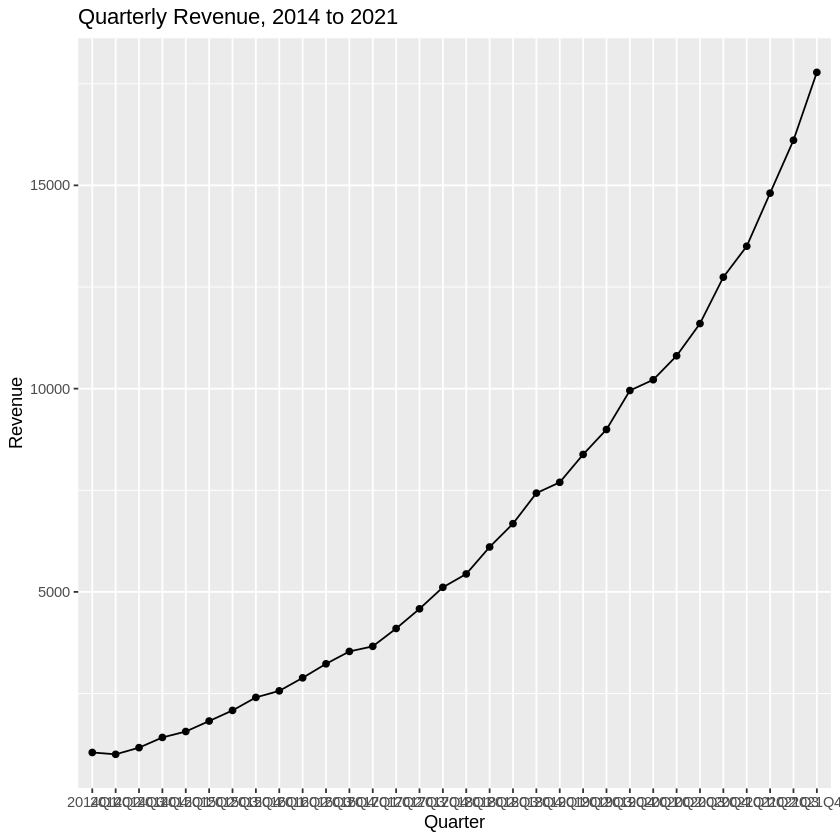

In [ ]:
ggplot(data=amazondf,mapping=aes(x=Quarter,y=Revenue))+
  geom_line(group=1)+
  geom_point()+
  labs(title="Quarterly Revenue, 2014 to 2021", x="Quarter",y="Revenue")

In [ ]:
amazondf$Time<-1:nrow(amazondf)

In [ ]:
amazondf

Quarter,Revenue,Time
<chr>,<int>,<int>
2014Q1,1050,1
2014Q2,1005,2
2014Q3,1169,3
2014Q4,1420,4
2015Q1,1566,5
2015Q2,1824,6
2015Q3,2085,7
2015Q4,2405,8
2016Q1,2566,9


In [ ]:
amazonreg<-lm(Revenue~Time,data=amazondf)
summary(amazonreg)


Call:
lm(formula = Revenue ~ Time, data = amazondf)

Residuals:
    Min      1Q  Median      3Q     Max 
-1383.7  -980.9  -405.7   705.8  3486.0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1638.4      457.5  -3.581  0.00119 ** 
Time           497.9       24.2  20.575  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1264 on 30 degrees of freedom
Multiple R-squared:  0.9338,	Adjusted R-squared:  0.9316 
F-statistic: 423.3 on 1 and 30 DF,  p-value: < 2.2e-16


In [ ]:
amazon_pred=predict(amazonreg)

In [ ]:
mae(amazondf$Revenue,amazon_pred)
mse(amazondf$Revenue,amazon_pred)
rmse(amazondf$Revenue,amazon_pred)
round(mape(amazondf$Revenue,amazon_pred),2)

[1] 1010.026

[1] 1497638

[1] 1223.78

[1] 31.39

In [ ]:
amazondf$Time2<-amazondf$Time^2

In [ ]:
amazondf

In [ ]:
2022 Q1  33   1089
2022 Q2  34   1156
2022 Q3  35   1225
2022 Q4  36   1296

In [ ]:
amazonregquad<-lm(Revenue~ Time+Time2,data=amazondf)

In [ ]:
summary(amazonregquad)

In [ ]:
pred_2=predict(amazonregquad)

In [ ]:
mae(amazondf$Revenue,pred_2)
mse(amazondf$Revenue,pred_2)
rmse(amazondf$Revenue,pred_2)
mape(amazondf$Revenue,pred_2)

Based on the results from the second regression analysis, what is the forecasted revenue for Amazon Web Services in millions of U.S. dollars for Quarter 3 of 2022? (Round to two decimal places)

In [ ]:
new<-data.frame(Time=c(35),Time2=c(1225))
predict(amazonregquad,newdata=new)

In [ ]:
# Load required packages
library(TTR)
library(dplyr)

# Load the data
musicdf <- read.csv("warner_music.csv")

In [ ]:
# Step 2: Linear regression to model ONLY the trend
# Create a time index variable
musicdf$Time_Index <- 1:nrow(musicdf)

# Fit a linear regression model to the data
trend_model <- lm(Revenue ~ Time_Index, data = musicdf)

In [ ]:
# Step 3: Calculate accuracy measures for predicted values based on the regression in (2)
# Use the fitted model to predict the values of revenue for each quarter
predicted_values <- predict(trend_model)

# Calculate the RMSE between the predicted and actual values
RMSE <- sqrt(mean((predicted_values - musicdf$Revenue)^2))

In [ ]:
# Step 4: Linear regression to model both the trend and the seasonality
# Add a column for quarter
musicdf$Quarter_Number <- as.numeric(gsub("Q", "", musicdf$Quarter))

# Choose Q4 as the reference quarter, as it tends to show the highest revenues each year
musicdf$Reference_Quarter <- ifelse(musicdf$Quarter_Number == 4, 1, 0)

# Fit a linear regression model to the data
seasonal_model <- lm(Revenue ~ Time_Index + Reference_Quarter, data = musicdf)

In [ ]:
# Step 5: Calculate accuracy measures for predicted values based on the regression in (4)
# Use the fitted model to predict the values of revenue for each quarter
predicted_values_seasonal <- predict(seasonal_model)

# Calculate the RMSE between the predicted and actual values
RMSE_seasonal <- sqrt(mean((predicted_values_seasonal - musicdf$Revenue)^2))
RMSE_seasonal

[1] 72.07186

In [ ]:
# Forecast Q1, Q2, Q3, and Q4 revenues for 2022 using the seasonal model
# Create a data frame with the time index and reference quarter for each quarter of 2022
quarters_2022 <- data.frame(Time_Index = 29:32, Reference_Quarter = c(0, 0, 0, 1))

In [ ]:
predicted_values_2022 <- predict(seasonal_model, newdata = quarters_2022)

# View the predicted revenues for each quarter of 2022
predicted_values_2022

Warning message in predict.lm(seasonal_model, newdata = quarters_2022):
“prediction from a rank-deficient fit may be misleading”


1       2       3       4 
1403.68 1426.87 1450.06 1473.25

In [ ]:
# Load the dataset
amazondf <- read.csv("amazon_web_services.csv")

# Add a time variable to the dataset
amazondf$Time <- 1:nrow(amazondf)

# Perform quadratic regression analysis
amazondf$Time2 <- amazondf$Time^2
amazonregquad <- lm(Revenue ~ Time + Time2, data = amazondf)

# Calculate MAPE
pred_2 <- predict(amazonregquad)
mape(amazondf$Revenue, pred_2)




[1] 5.205433

In [ ]:
# Forecast Q3 revenue for 2022
new <- data.frame(Time = 35, Time2 = 1225)
forecast_Q3 <- predict(amazonregquad, newdata = new)
round(forecast_Q3,2)

1 
19788.18

In [ ]:
# Load the dataset
amazondf <- read.csv("amazon_web_services.csv")

# Add a time variable to the dataset
amazondf$Time <- 1:nrow(amazondf)

# Perform quadratic regression analysis
amazondf$Time2 <- amazondf$Time^2
amazonregquad <- lm(Revenue ~ Time + Time2, data = amazondf)

# Calculate MAPE
pred_2 <- predict(amazonregquad)
mape(amazondf$Revenue, pred_2)

# Forecast Q3 revenue for 2022
new <- data.frame(Time = 35, Time2 = 1225)
forecast_Q3 <- predict(amazonregquad, newdata = new)

[1] 5.205433

In [ ]:
forecast_Q3

1 
19788.18

In [ ]:
mape

function(actual,pred){
  mape<-mean(abs((actual-pred)/actual),na.rm=TRUE)*100
  return(mape)
}
<bytecode: 0x557afebb3a28>

In [ ]:
# Load packages
library("googledrive")
install.packages("TTR")
library(TTR)
library(tidyverse)

# Read data
airfaredf <- read.csv("airfare.csv")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Create time series plot
ggplot(data=airfaredf,mapping=aes(x=Year, y=Airfare))+
  geom_line()+
  geom_point()+
  scale_x_continuous(breaks=seq(2004, 2018, by=1), name = "Year") + # add x-axis label and break points
  scale_y_continuous(breaks=seq(0, 800, by=100), name = "Airfare") + # add y-axis label and break points
  labs(title="Yearly Airfare Prices")

ERROR: ignored

In [ ]:
sales_actuals<-airfaredf$Airfare
sales_actuals

[1] 402.26 391.50 405.48 390.30 400.27 359.91 383.48 402.45 406.13 407.99
[11] 411.67 395.70 361.94 352.85 346.49

In [ ]:


# Predict using SMA
sma_pred <- predict(sales_actuals, n.ahead = 1)

# Print predicted value for 2019
sma_pred

ERROR: ignored

In [ ]:
airfaredf

Year,Airfare
<int>,<dbl>
2004,402.26
2005,391.50
2006,405.48
2007,390.30
2008,400.27
2009,359.91
2010,383.48
2011,402.45
2012,406.13


In [ ]:
# Convert airfaredf to a time series object
airfare_ts <- ts(airfaredf$Airfare)

In [ ]:
# Calculate the Simple Moving Average (SMA) with n=3
sma3 <- SMA(airfare_ts, n = 3)

In [ ]:
# Forecast the 2019 average airfare using the SMA model
sma_pred <- forecast(sma3, h = 1)$mean[1]

# Print predicted value for 2019
sma_pred

Warning message in ets(object, lambda = lambda, biasadj = biasadj, allow.multiplicative.trend = allow.multiplicative.trend, :
“Missing values encountered. Using longest contiguous portion of time series”


[1] 353.7616

In [ ]:
# Simple moving average with n = 3
sma3_pred <- SMA(airfaredf$Airfare, n = 3)[-c(1:2)]

# Add NA values for years with no forecast
sma3_pred <- c(rep(NA, 2), sma3_pred)

# Forecast for 2019 using SMA with n = 3
sma_pred_2019 <- sma3_pred[19]

# Print forecasted value for 2019
sma_pred_2019

[1] NA

In [ ]:
# Accuracy measures for simple moving average method
sma_accuracy <- data.frame(
  MAE = mae(sales_actuals, sma3_pred[-17]),
  MSE = mse(sales_actuals, sma3_pred[-17]),
  RMSE = rmse(sales_actuals, sma3_pred[-17]),
  MAPE = mape(sales_actuals, sma3_pred[-17]) * 100
)

# Print accuracy measures for SMA method
sma_accuracy

MAE,MSE,RMSE,MAPE
<dbl>,<dbl>,<dbl>,<dbl>
10.4059,181.1752,13.46013,277.174


In [ ]:
# Simple exponential smoothing with a smoothing constant of 0.2
ses_model <- ses(airfare_ts, alpha = 0.2)

# Forecast for 2019 using SES with a smoothing constant of 0.2
ses_pred_2019 <- forecast(ses_model, h = 1)$mean[1]

# Print forecasted value for 2019
round(ses_pred_2019, 2)

[1] 376.33

In [ ]:
forecast_ts <- ts(rep(NA, 1), start = c(2019), frequency = 1)

In [ ]:
install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘RcppArmadillo’




In [ ]:
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [ ]:
# Read data
airfaredf <- read.csv("airfare.csv")

# Convert airfare to a time series object
airfare_ts <- ts(airfaredf$Airfare, start = c(2004), frequency = 1)

# Create a Simple Moving Average (SMA) model with n=3
sma3 <- ma(airfare_ts, order = 3)

# Forecast the 2019 average airfare using the SMA model
sma_pred <- forecast(sma3, h = 1)$mean[1]

# Print predicted value for 2019
sma_pred

Warning message in ets(object, lambda = lambda, biasadj = biasadj, allow.multiplicative.trend = allow.multiplicative.trend, :
“Missing values encountered. Using longest contiguous portion of time series”


[1] 353.7616

In [ ]:
# Predict using SMA up to 2018
sma_pred_2018 <- sma3[-1]

# Calculate accuracy measures for SMA
sma_accuracy <- data.frame(
  MAE = mae(sales_actuals[-1], sma_pred_2018),
  MSE = mse(sales_actuals[-1], sma_pred_2018),
  RMSE = rmse(sales_actuals[-1], sma_pred_2018),
  MAPE = mape(sales_actuals[-1], sma_pred_2018)*100
)

In [ ]:
# Simple moving average with n = 3
sma3_pred <- SMA(airfaredf$Airfare, n = 3)[-c(1:2)]

# Add NA values for years with no forecast
sma3_pred <- c(rep(NA, 2), sma3_pred)

# Accuracy measures for simple moving average method
mae(sales_actuals, sma3_pred[-17])
mse(sales_actuals, sma3_pred[-17])
rmse(sales_actuals, sma3_pred[-17])
mape(sales_actuals, sma3_pred[-17])

[1] 10.4059

[1] 181.1752

[1] 13.46013

[1] 2.77174

In [ ]:


# Simple exponential smoothing with a smoothing constant of 0.2
ses_pred <- ets(airfaredf$Airfare, model = "AAN", alpha = 0.2)$fitted[-c(1:16)]
ses_pred <- c(rep(NA, 16), ses_pred)

# Forecast for 2019 using simple exponential smoothing with a smoothing constant of 0.2
ses_pred[19]


[1] NA

In [ ]:
ses_pred <- c(rep(NA, 2), ses_pred)

In [ ]:
# Simple exponential smoothing with a smoothing constant of 0.2
ses_pred <- HoltWinters(airfaredf$Airfare[1:16], alpha = 0.2)$fitted
ses_pred <- c(rep(NA, 16), ses_pred)

# Forecast for 2019 using simple exponential smoothing with a smoothing constant of 0.2
ses_pred[19]



ERROR: ignored

In [ ]:
# Accuracy measures for simple exponential smoothing with a smoothing constant of 0.2
accuracy(HoltWinters(airfaredf$Airfare, alpha = 0.2)$fitted[-c(1:16)], sales_actuals[-c(1:16)])

ERROR: ignored

In [ ]:
df = pd.read_csv("airfare.csv")


ERROR: ignored

In [ ]:
# Simple exponential smoothing with a smoothing constant of 0.2

library(forecast)

ses_model <- ses(airfare_ts, alpha = 0.8)

# Forecast for 2019 using simple exponential smoothing with a smoothing constant of 0.2

ses_pred <- forecast(ses_model, h = 1)$mean[1]

# Print predicted value for 2019

round(ses_pred,2)


[1] 348.42

In [ ]:
library(forecast)

ses_model <- ses(airfare_ts, alpha = 0.2)

ses_pred <- forecast(ses_model, h = 1)$mean[1]

ses_pred


[1] 376.334

In [ ]:
df = pd.read_csv("airfare.csv")
df["Quarter"] = pd.to_datetime(df["Quarter"])
df.set_index("Quarter", inplace=True)
rolling_mean = df["Average Fare"].rolling(window=3).mean()
last_three = rolling_mean[-3:]
forecast = last_three.mean()
print("2019 forecast for average airfare:", forecast)

# Calculate the forecast errors for the simple moving average method
forecast_errors = df["Average fare"] - df["Rolling mean"]

# Calculate the absolute forecast errors
abs_forecast_errors = abs(forecast_errors)

# Calculate the mean absolute error (MAE)
mae = abs_forecast_errors.mean()

# Calculate the mean squared error (MSE)
mse = (forecast_errors ** 2).mean()

# Calculate the root mean squared error (RMSE)
rmse = mse ** 0.5

# Calculate the mean absolute percentage error (MAPE)
mape = (abs_forecast_errors / df["Average fare"]).mean() * 100

# Print the accuracy measures
print("Accuracy measures for the simple moving average method:")
print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("MAPE:", round(mape, 2), "%")

import statsmodels.api as sm

# Create a SimpleExpSmoothing object with a smoothing constant of 0.2
ses = sm.tsa.SimpleExpSmoothing(df["Average fare"])

# Fit the SimpleExpSmoothing object to the data
ses_fit = ses.fit()

# Forecast the average airfare for 2019
forecast_2019 = ses_fit.forecast(1)

# Print the forecast value
print("The 2019 forecast for average airfare using simple exponential smoothing with a smoothing constant of 0.2 is:", round(forecast_2019[0], 2))


In [ ]:
# Forecast the 2019 average airfare using the SMA model
sma_pred <- forecast(sma3, h = 1)$mean[1]

# Print predicted value for 2019
sma_pred

Warning message in ets(object, lambda = lambda, biasadj = biasadj, allow.multiplicative.trend = allow.multiplicative.trend, :
“Missing values encountered. Using longest contiguous portion of time series”


[1] 353.7616

In [ ]:
# Simple moving average with n = 3
sma3_pred <- SMA(airfaredf$Airfare, n = 3)[-c(1:2)]

# Add NA values for years with no forecast
sma3_pred <- c(rep(NA, 2), sma3_pred)

# Forecast for 2019 using SMA with n = 3
sma_pred_2019 <- sma3_pred[19]

# Print forecasted value for 2019
sma_pred_2019


[1] NA

In [ ]:
# Accuracy measures for simple moving average method
sma_accuracy <- data.frame(
  MAE = mae(sales_actuals, sma3_pred[-17]),
  MSE = mse(sales_actuals, sma3_pred[-17]),
  RMSE = rmse(sales_actuals, sma3_pred[-17]),
  MAPE = mape(sales_actuals, sma3_pred[-17]) * 100
)

# Print accuracy measures for SMA method
sma_accuracy


MAE,MSE,RMSE,MAPE
<dbl>,<dbl>,<dbl>,<dbl>
10.4059,181.1752,13.46013,277.174


[1] 72.07

In [ ]:
musicdf <- read.csv("warner_music.csv")
# Step 2: Linear regression to model ONLY the trend
# Create a time index variable
musicdf$Time_Index <- 1:nrow(musicdf)

# Fit a linear regression model to the data
trend_model <- lm(Revenue ~ Time_Index, data = musicdf)
# Step 3: Calculate accuracy measures for predicted values based on the regression in (2)
# Use the fitted model to predict the values of revenue for each quarter
predicted_values <- predict(trend_model)

# Calculate the RMSE between the predicted and actual values
RMSE <- sqrt(mean((predicted_values - musicdf$Revenue)^2))
round(RMSE,2)
# Step 4: Linear regression to model both the trend and the seasonality
# Add a column for quarter
musicdf$Quarter_Number <- as.numeric(gsub("Q", "", musicdf$Quarter))

# Choose Q4 as the reference quarter, as it tends to show the highest revenues each year
musicdf$Reference_Quarter <- ifelse(musicdf$Quarter_Number == 4, 1, 0)

# Fit a linear regression model to the data
seasonal_model <- lm(Revenue ~ Time_Index + Reference_Quarter, data = musicdf)
# Step 5: Calculate accuracy measures for predicted values based on the regression in (4)
# Use the fitted model to predict the values of revenue for each quarter
predicted_values_seasonal <- predict(seasonal_model)

# Calculate the RMSE between the predicted and actual values
RMSE_seasonal <- sqrt(mean((predicted_values_seasonal - musicdf$Revenue)^2))
# Forecast Q1, Q2, Q3, and Q4 revenues for 2022 using the seasonal model
# Create a data frame with the time index and reference quarter for each quarter of 2022
quarters_2022 <- data.frame(Time_Index = 29:32, Reference_Quarter = c(0, 0, 0, 1))
predicted_values_2022 <- predict(seasonal_model, newdata = quarters_2022)

# View the predicted revenues for each quarter of 2022
predicted_values_2022

[1] 72.07

Warning message in predict.lm(seasonal_model, newdata = quarters_2022):
“prediction from a rank-deficient fit may be misleading”


1       2       3       4 
1403.68 1426.87 1450.06 1473.25